<a href="https://colab.research.google.com/github/lima-breno/data_wrangling/blob/main/DW_07_3_Manipulando_dados_JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo de Arquivo JSON

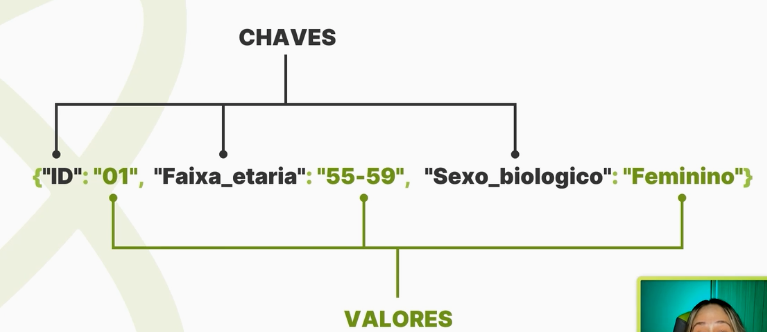

In [ ]:
#JSON = JavaScript Object Notation

Importando um arquivo JSON

In [ ]:
import pandas as pd

In [ ]:
# Para fazer esta aula, tive que baixar o arquivo 'pacientes.json',
## disponibilizado no link do google docs na pasta

In [ ]:
dados_pacientes = pd.read_json('/content/pacientes.json')

In [ ]:
dados_pacientes.head()

,ID_paciente,Doenca_cardiaca,IMC,Fumante,Consumo_alcool,AVC,Saude_fisica,Saude_mental,Dificuldade_caminhar,Sexo_biologico,Faixa_etaria,Raca,Diabetes,Atividade_fisica,Saude_geral,Horas_sono,Asma,Doenca_renal,Cancer_pele
0,0,Nao,16.60,Sim,Nao,Nao,3,30,Nao,Feminino,55-59,Branca,Sim,Sim,Muito boa,5,Sim,Nao,Sim
1,1,Nao,20.34,Nao,Nao,Sim,0,0,Nao,Feminino,80 ou +,Branca,Nao,Sim,Muito boa,7,Nao,Nao,Nao
2,2,Nao,26.58,Sim,Nao,Nao,20,30,Nao,Masculino,65-69,Branca,Sim,Sim,Razoavel,8,Sim,Nao,Nao
3,3,Nao,24.21,Nao,Nao,Nao,0,0,Nao,Feminino,75-79,Branca,Nao,No,Boa,6,Nao,Nao,Sim
4,4,Nao,23.71,Nao,Nao,Nao,28,0,Sim,Feminino,40-44,Branca,Nao,Sim,Muito boa,8,Nao,Nao,Nao


In [ ]:
#FEITOO!

# Normalizando a estrutura de um arquivo

Nem sempre as informações em um arquivo JSON podem ser faceis de ler! Esta dificuldade ocorre pq as informações podem estar aninhadas. EX:

In [ ]:
dados_pacientes_2 = pd.read_json('/content/pacientes_2.json')

In [ ]:
dados_pacientes_2

,Pesquisa,Ano,Pacientes
0,Principais Indicadores de Doenca Cardiaca,2020,"{'ID': '01', 'Faixa_etaria': '55-59', 'Sexo_bi..."
1,Principais Indicadores de Doenca Cardiaca,2020,"{'ID': '02', 'Faixa_etaria': '80 ou +', 'Sexo_..."
2,Principais Indicadores de Doenca Cardiaca,2020,"{'ID': '03', 'Faixa_etaria': '65-69', 'Sexo_bi..."


In [ ]:
# Os dados acima estão aninhados, tornando dificil a leitura

In [ ]:
# Para acessar um editor de textos JSON, é possível ir no seguinte link:
# jsoncrack.com

In [ ]:
#Função utilizada para normalizar os dados JSON
  #Para esta função, eu preciso indicar qual os dados que quero normalizar +
  #qual a coluna que quero normalizar, neste caso foi a coluna pacientes!

df_normalizado = pd.json_normalize(dados_pacientes_2['Pacientes'])

In [ ]:
#Verificando se deu certo a normalização
df_normalizado

,ID,Faixa_etaria,Sexo_biologico,Raça,IMC,Fumante,Consumo_alcool,Saude_fisica,Saude_mental,Dificuldade_caminhar,Atividade_fisica,Saude_geral,Horas_sono,Problemas_saude
0,01,55-59,Feminino,Branca,16.60,Sim,Nao,3,30,Nao,Sim,Muito boa,5,"[Diabetes, Asma, Cancer_pele]"
1,02,80 ou +,Feminino,Branca,20.34,Nao,Nao,0,0,Nao,Sim,Muito boa,7,[AVC]
2,03,65-69,Masculino,Branca,26.58,Sim,Nao,20,30,Nao,Sim,Muito boa,8,"[diabetes, Asma]"


Salvando arquivo normalizado

In [ ]:
df_normalizado.to_json('historico_pacientes_nomalizado.json,index=False')

In [ ]:
#abrindo o arquivopara ver se deu boa
pd.read_json('/content/historico_pacientes_nomalizado.json')

,ID,Faixa_etaria,Sexo_biologico,Raça,IMC,Fumante,Consumo_alcool,Saude_fisica,Saude_mental,Dificuldade_caminhar,Atividade_fisica,Saude_geral,Horas_sono,Problemas_saude
0,1,55-59,Feminino,Branca,16.60,Sim,Nao,3,30,Nao,Sim,Muito boa,5,"[Diabetes, Asma, Cancer_pele]"
1,2,80 ou +,Feminino,Branca,20.34,Nao,Nao,0,0,Nao,Sim,Muito boa,7,[AVC]
2,3,65-69,Masculino,Branca,26.58,Sim,Nao,20,30,Nao,Sim,Muito boa,8,"[diabetes, Asma]"
